# Estudio de arritmia cardíaca

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Carga de librerías

* __numpy:__ Para manipulación numérica y funciones estadísticas básicas
* __matplotlib.pyplot:__ Para generación de gráficos.
* __scipy.io:__ Para carga de datos provenientes de archivos _.mat_

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

## Configuración de carpetas

In [ ]:
data_path = "/content/drive/MyDrive/ECG_Dataset/"

## Carga de datos

[Archivo de descarga](../../data/JS00001.mat)

In [ ]:
data = sio.loadmat(data_path+"JS00001.mat")

In [ ]:
print(type(data))


<class 'dict'>


In [ ]:
print(data.keys())


dict_keys(['val'])


In [ ]:
print(type(data["val"]))


<class 'numpy.ndarray'>


In [ ]:
print(data["val"].shape)

(12, 5000)


In [ ]:
lead_10 = data["val"][9, :]

In [ ]:
t0 = 0
tf = 10
t = np.linspace(t0, tf, 5000)

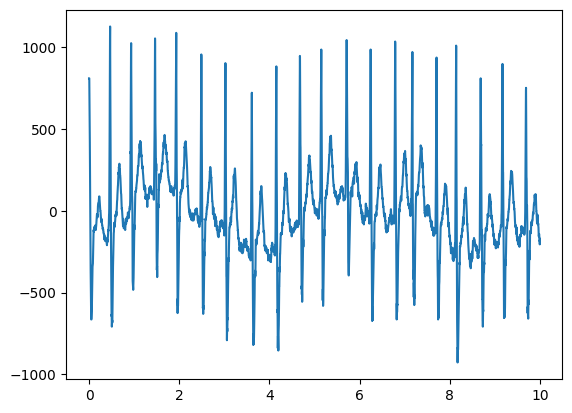

In [ ]:
fig01 = plt.figure()
plt.plot(t,lead_10)

In [ ]:
ecg_fft = np.fft.fft(lead_10)
ecg_fft

array([ -50343.             +0.j        ,
        -44427.87292792 -48118.33430899j,
        -14003.60280291-331886.8477886j , ...,
       -134619.87742102 -46991.97629606j,
        -14003.60280291+331886.8477886j ,
        -44427.87292792 +48118.33430899j])

In [ ]:
mag_ecg_fft = np.abs(ecg_fft)
f_vect = np.fft.fftfreq(len(mag_ecg_fft))

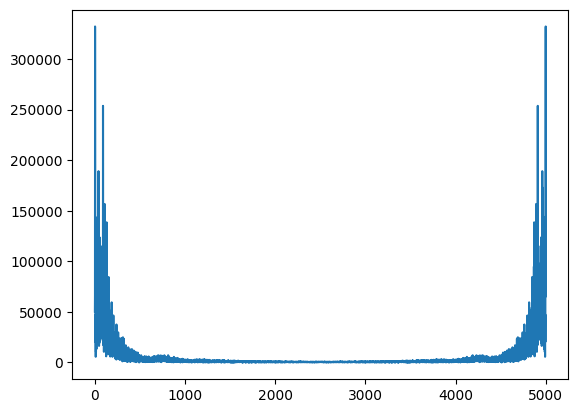

In [ ]:
plt.plot(mag_ecg_fft)

In [ ]:
N = len(mag_ecg_fft)
f_vect1 = 500*f_vect[:np.uint(N/2)]
mag_ecg_fft1 = mag_ecg_fft[:np.uint(N/2)]

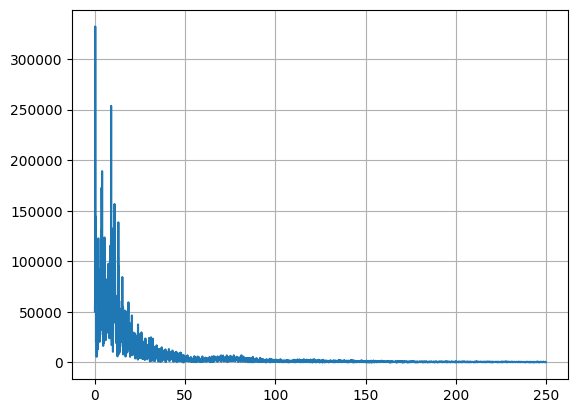

In [ ]:
plt.plot(f_vect1, mag_ecg_fft1)
plt.grid()